![Curso de Visión Artificial](imagenes/encabezado.png)



# Procesamiento Básico de Imágenes I

Después de la captura de las imágenes, el siguiente paso consiste en preprocesar la imagen a fin de eliminar el ruido en la misma y/o resaltar los objetos de interés. Como se mencionó en la clase, existen diferentes tipos de operaciones. En esta práctica nos centraremos en las operaciones puntuales, específicamente en las transformaciones lineales y las transformaciones sobre el histograma.


## El Histograma de una Imagen

El histograma es una representación gráfica de la distribución de los distintos tonos (niveles de gris) de una imagen. Así, el histograma nos permite identificar si la imagen está oscura, demasiado clara o si no tiene el suficiente contraste. En este sentido, el histograma se convierte en una herramienta que nos ayuda a determinar qué operación u operaciones se requieren para mejorar la calidad de una imagen.

En la práctica, el histograma es un gráfico de barras en el que el eje horizontal representa los diferentes tonos de gris desde el negro puro (a la izquierda, con un valor de 0) al blanco puro (a la derecha, con un valor de 255). Por otro lado, el eje vertical representa el número de pixeles que contiene la imagen para cada tono representado en el eje horizontal. Una descripción gráfica se muestra en la siguiente imagen.

![Histograma](imagenes/Histograma.png)

<br/>
La figura de abajo muestra una imagen y su histograma, resaltando la ubicación aproximada de los tonos de la imagen. Note que en este caso en el eje horizontal los valores están en el rango [0, 1]. Esto es porque la imagen es de tipo <span style="color:green; font-family:Courier new">float</span> float y **NO** <span style="color:green; font-family:Courier new">uint8</span>.

![Histograma](imagenes/Histograma2.png)

La imagen de arriba es un ejemplo que contiene un rango tonal amplio. Esta escena de un paisaje contiene muchos tonos medios, pero tiene pocas regiones de sombras y pocas zonas muy iluminadas. Esto se traduce en un histograma que tiene un alto recuento de píxeles tanto en el sector central, aunque sobre cargado a la izquierda porque los medios tonos tienden a ser grises no tan claros.

Para analizar una imagen a partir de su histograma debemos tener presente las siguientes consideraciones:

Histograma | Análisis del Histograma
---|---
![Histograma](imagenes/h_ideal.png) | Este histograma contiene casi la gama completa de tonalidades de luz que el sensor de la cámara puede capturar. Es decir, el histograma está distribuido uniformemente, de borde a borde, no hacia los lados.
![Histograma](imagenes/h_dark.png) | En el histograma puede observarse que la imagen está oscura (subexpuesta). La gráfica tiene a desplazarse a la izquierda y en la parte derecha no hay mucha información (no hay puntos blancos). La imagen contiene muchas zonas totalmente negras las cuales se representan como un pico en el extremo izquierdo del histograma.
![Histograma](imagenes/h_over-exp.jpeg) | Este es un histograma para una escena con tonos muy claros (sobreexpuesta). Observe el espacio en el lado izquierdo que indica la falta de cualquier negro en la imagen. Esto significa que pueden haber muchos detalles perdidos de la escena entre las áreas blancas de la imagen.

## El Histograma en Skimage

Para iniciar, importamos las bibliotecas que requerimos. En este caso usaremos 2 paquetes adicionales a los de la práctica anterior:
* <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> color:</span> que es un paquete de <span style="font-family:Courier new"> skimage:</span> que contiene la funciones para el cambio de espacios de color de una imagen, entre ellas la función para convertir una imagen de color a niveles de gris.
* <span style="background-color:#DDDDDD; color:blue; font-family:Courier new"> exposure:</span> otro paquete de <span style="font-family:Courier new"> skimage:</span> que tiene las funciones para la creación y manipulación de histogramas de una imagen.

Ahora importemos dichas bibliotecas y paquetes en Python:

In [2]:
# Siempre que usemos matplotlib en Jupyter es necesario poner esta línea antes de cualquier otra
%matplotlib inline

# Importamos las bibliotecas necesarias y les asigamos un alias
import skimage                           # Biblioteca para la manipulación de imágenes
import numpy as np                       # Biblioteca para la manipulación de matrices

# Importamos algunos paquetes específicos
from matplotlib import pyplot as plt     # Biblioteca para crear graficas y mostrar las imágenes en pantalla
from skimage import data                 # Paquete con imágenes de prueba
from skimage import io                   # Paquete para lectura/escritura de imágenes

###########################################

from skimage import color
from skimage import exposure
from matplotlib import colors as cl


Lo primero que haremos será construir el histograma de una imagen en niveles de gris. Para ello debemos:
1. Cargamos la imagen
2. Calculamos la distribución de los niveles de intensidad (el histograma)
3. Mostramos el histograma junto con su imagen

Dimensiones:  (512, 512)


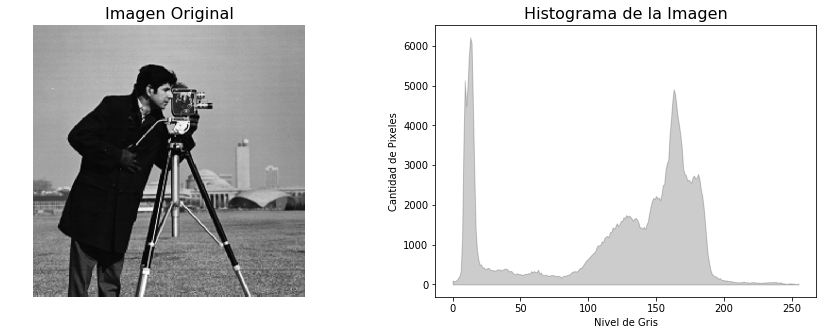

In [7]:
# Cargamos la imagen
img = data.camera()
print('Dimensiones: ',img.shape)
# Calculamos la distribución de los niveles de intensidad (el histograma)
hist, bins = exposure.histogram(img)

# Mostramos la imagen junto con su histograma
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))

# Se muestra la imagen en el primer subplot
ax0.imshow(img, cmap='gray')
ax0.set_title('Imagen Original', fontsize=16)
ax0.axis('off')

# Se muestra el histograma en el segundo subplot
ax1.set_xlabel('Nivel de Gris');
ax1.set_ylabel('Cantidad de Pixeles');
ax1.set_title('Histograma de la Imagen', fontsize=16)
ax1.fill_between(bins, hist, alpha=0.2, color='black');

Cómo se puede observar, el histograma de una imagen muestra el número de píxeles que hay por cada nivel de gris. Los **valores bajos de intensidad**, cercanos al cero, representan los niveles de gris oscuros y cercanos al negro. Los **valores de intensidad altos** son aquellos que están más cerca del blanco.

<div style="padding:10px; border-radius:10px; border:2px solid #A43D39; background:#EEEEEE">
<span style="color:#A43D39"><h3>**Nota:**</h3></span> observe que hay un pico alto en el nivel de gris alrededor del 10. Este pico es el que corresponde al abrigo, casi negro, del hombre. El pico alrededor de la mitad del histograma se debe al tono predominantemente gris de la imagen. </div>

## El Histograma de una Imagen a Color

Ahora, veamos el histograma de una imagen a color. En este caso el histograma no se puede visualizar directamente, sino que debemos descomponer la imagen en sus canales y visualizar los tres histogramas en un sólo gráfico. Para este caso:
1. Cargamos la imagen a color
2. Calculamos la distribución de los niveles de intensidad para cada canal de la imagen
3. Mostramos la imagen y su histograma compuesto

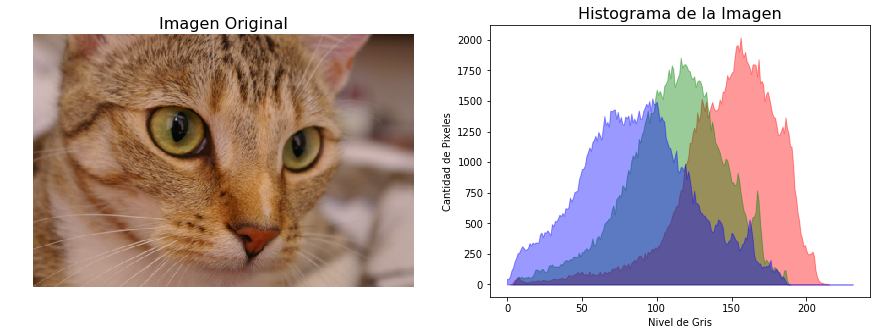

In [16]:
# Cargamos una de las imágenes a color de la práctica
img = data.chelsea()

# Calculamos la distribución de los niveles de intensidad de cada canal
hist_R, bins_R = exposure.histogram(img[:,:,0])
hist_G, bins_G = exposure.histogram(img[:,:,1])
hist_B, bins_B = exposure.histogram(img[:,:,2])

# Mostramos la imagen junto con su histograma
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))

# Se muestra la imagen en el primer subplot
ax0.imshow(img)
ax0.set_title('Imagen Original', fontsize=16)
ax0.axis('off')

# Se muestra el histograma en el segundo subplot
#ax1.axis('off')
ax1.set_xlabel('Nivel de Gris');
ax1.set_ylabel('Cantidad de Pixeles');
ax1.set_title('Histograma de la Imagen', fontsize=16)
ax1.fill_between(bins_R, hist_R, alpha=0.4, color='r');
ax1.fill_between(bins_G, hist_G, alpha=0.4, color='g');
ax1.fill_between(bins_B, hist_B, alpha=0.4, color='b');

Como se puede observar, la intensidad de cada canal RGB se muestra por separado. A diferencia del histograma anterior, estos histogramas casi parecen distribuciones gaussianas que se desplazan. Esto refleja el hecho de que los cambios de intensidad son relativamente graduales en esta imagen, es decir, no hay muchas regiones con una intensidad uniforme en esta imagen.

<div style="padding:10px; border-radius:10px; border:2px solid #9BBB59;">
<span style="color:#9BBB59"><h3>**Hazlo tu mismo!**</h3></span> 
Como vamos a empezar a utilizar ampliamente el histograma de una imagen, lo más conveniente en este punto es definir una función que a partir de una imagen de entrada muestre el histograma de la misma. Para ello tenga presente los comentarios de la sección de implementación siguiente.
</div>


In [5]:
def show_img_and_hist(img):

    # Obtenga las dimensiones de la imagen
    d = img.shape
    
    # Cree una nueva figura usando el paquete PyPlot (plt)
    #f, (ax0, ax1) = plt.subplots(1,2, figsize=(15,5))
    
    # Use este condicional para con base en el número de canales de la imagen
    # mostrar el histograma de una imagen en niveles de gris o a color
    if len(d) <= 2:
        
        # Calculamos la distribución de los niveles de intensidad (el histograma)
        hist, bins = exposure.histogram(img)
        
        # Mostramos la imagen junto con su histograma uasndo plt.subplots
        #...
        
        # Se muestra la imagen en el primer subplot
        f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Como queremos una función general, tenmos cuidado si la imagen es uint8 o float 
        # Lo anterior porque la representación del color cambia y se debe mostrar toda la gama de grieses en la img
        if (img.dtype == "uint8"):
            ax0.imshow(img, cmap='gray', norm=cl.Normalize(vmin=0, vmax=255))
        else:
            ax0.imshow(img, cmap='gray', norm=cl.Normalize(vmin=0, vmax=1))
            
        ax0.set_title('Imagen Original', fontsize=16)
        ax0.axis('off')
        
        # Se muestra el histograma en el segundo subplot
        ax1.set_xlabel('Nivel de Gris');
        ax1.set_ylabel('Cantidad de Pixeles');
        ax1.set_title('Histograma de la Imagen', fontsize=16)
        ax1.fill_between(bins, hist, alpha=0.3, color='black');
        l, r = ax1.set_xlim()
        
    else:
        # Calculamos la distribución de los niveles de intensidad de cada canal
        hist_R, bins_R = exposure.histogram(img[:,:,0])
        hist_G, bins_G = exposure.histogram(img[:,:,1])
        hist_B, bins_B = exposure.histogram(img[:,:,2])
        
        # Mostramos la imagen junto con su histograma
        f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15, 5))
        
        # Se muestra la imagen en el primer subplot
        ax0.imshow(img)
        ax0.set_title('Imagen Original', fontsize=16)
        ax0.axis('off')        
        
        # Se muestra el histograma en el segundo subplot
        ax1.set_xlabel('Nivel de Gris');
        ax1.set_ylabel('Cantidad de Pixeles');
        ax1.set_title('Histograma de la Imagen', fontsize=16)
        ax1.fill_between(bins_R, hist_R, alpha=0.3, color='r');
        ax1.fill_between(bins_G, hist_G, alpha=0.3, color='g');
        ax1.fill_between(bins_B, hist_B, alpha=0.3, color='b');
        l, r = ax1.set_xlim()
    
    #Finalmente hacemos un ajuste del eje X, en el histograma con base en el max y mínimo valor
    m = img.min()
    M = img.max()

    #Para que el gráfico incie en 0 y termine en 1 o 255
    if (m >= 0):
        if (M > 1):
            l = -10
        else:
            l = -0.025

    if (M >= 0 and M <= 1):
        r = 1.025
    elif(M > 1 and M <= 255):
        r = 265

    ax1.set_xlim(l, r)


## Operaciones Puntuales
Las operaciones puntuales son aquellas operaciones en las que se transforma cada píxel de la imagen de manera independiente. Es decir, el valor de salida de una operación puntual depende sólo del píxel al que se le está aplicando la transformación.

Entre estas operaciones están:
* Aumento del brillo de la imagen
* Disminución del brillo de la imagen
* Negativo de una imagen
* "Estiramiento" de los niveles de gris de una imagen

Todas estas operaciones se pueden aplicar con una transformación lineal que tiene la forma:
<span style="background-color:#DDDDDD; color:blue; font-family:Courier new">G(x,y) =  a*I(x,y) + b</span>

Veamos cada operación de forma independiente.

### Aumento de Brillo
El aumento de brillo consiste en sumar un valor positivo (b) a todos los píxeles de la imagen. Esta operación hace que el histograma de la imagen se corra a la derecha y por tanto se debe tener cuidado con la saturación de los píxeles en el valor máximo del nivel de gris de la misma.

Veamos 2 ejemplos para aumentar el brillo de una imagen.


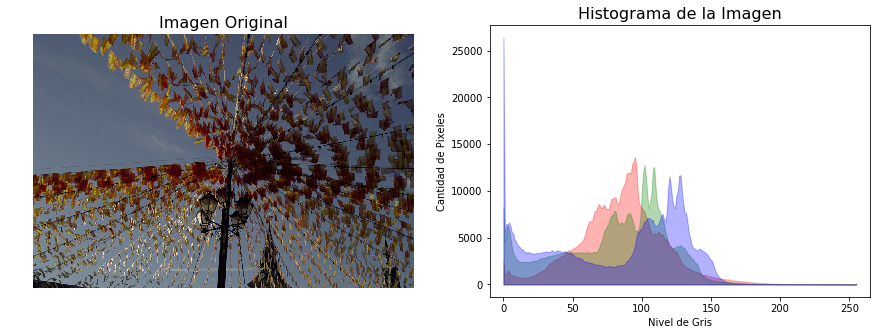

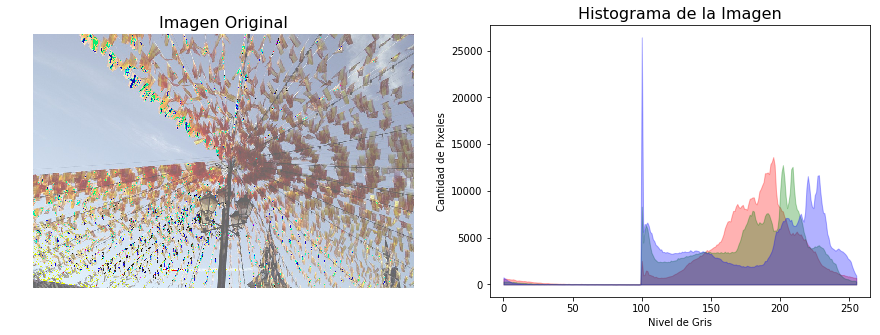

In [6]:
#Leemos una de las imágenes de prueba, en este caso img3.jpg
img = io.imread("imagenes/img3.jpg")

#Aumentamos el brillo de la imagen, sumando a la misma un valor positivo
img2 = img + 100

#Visualizamos las dos imágenes y sus histogramas
show_img_and_hist(img)
show_img_and_hist(img2)

<div style="padding:10px; border-radius:10px; border:2px solid #A43D39; background:#EEEEEE">
<span style="color:#A43D39"><h3>**Importante:**</h3></span> Observa algo **particular** en el resultado anterior? <br/><br/>
Los píxeles más claros en la imagen original ahora son negros! Esto sucede porque NumPy **NO** satura los valores que se salen del rango sino que los "reinicia". Cuando en la imagen original, un pixel toma el valor de 200, por ejemplo, al hacer el aumento de brillo (con un valor de 100), dicho pixel tomaría el valor de 300 y debería ser saturado en el 255. Sin embargo, NumPy hace que los valres que estén por encima del máximo se "reinicien", es decir un pixel con valor de 256 toma el valor de 0, un pixel con valor de 260 toma el valor de 5 y un pixel que debería tomar el valor de 300 toma el valor de 44. <br/><br/>

Esto significa que debemos tener mucho cuidado con las operaciones que generan valores por encima del máximo o por debajo del mínimo, como sucede con el aumento o disminución del brillo. En dicho caso debemos hacer un par de pasos adicionales, como se muestra a continuación.
</div>

Valor máximo de intensidad en la imagen original:  255
Valor del máximo despues de la converion a flotante:  1.0
Valor del máximo despues del aumento de brillo:  1.4
Valor del máximo despues del aumento de brillo:  1.0


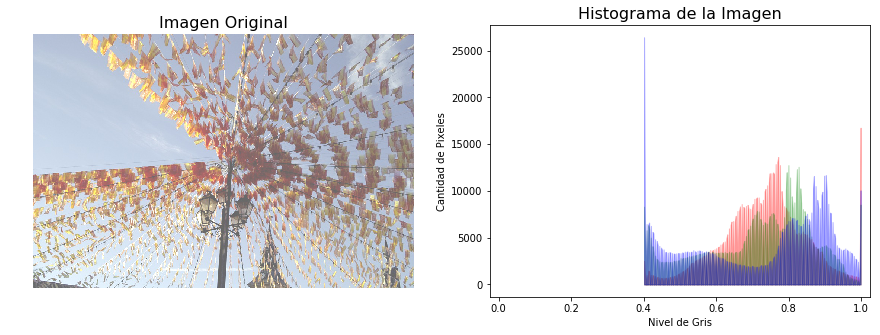

In [7]:
# Mostramos el valor máximo de la imagen, solo para efectos de análisis
print("Valor máximo de intensidad en la imagen original: ",img.max())

# Cambiamos la representación de la imagen a real:
img_c = skimage.img_as_float64(img)
print("Valor del máximo despues de la converion a flotante: ",img_c.max())

# Aumentamos el brillo de la imagen, sumando un valor entre 0 y 1
img_c2 = img_c + 0.4

# Observe que los valroes de salida están por fuera del rango [0,1], por el aumento de brillo
print("Valor del máximo despues del aumento de brillo: ",img_c2.max())

# Para devolver la imagen al rango [0,1] usamos la función clip de NumPy
img_c2 = np.clip(img_c2, 0, 1);

# Mostramos el valor máximo de la imagen de salida, solo para efectos de análisis
print("Valor del máximo despues del aumento de brillo: ",img_c2.max())

# Mostramos la imagen resultante y su histograma
show_img_and_hist(img_c2)

Note que en este caso hubo una saturación de los píxeles en el valor máximo y, además, el histograma se desplazó a la derecha, lo cual es congruente con lo visto en la clase teórica.

### Disminución del Brillo
En este caso, en lugar de sumar un valor a la imagen lo restamos. Nuevamente, se debe tener especial cuidado con el tipo de dato de la imagen pues al aplicar esta operación pueden resultar valores negativos.

Vamos como hacerlo.

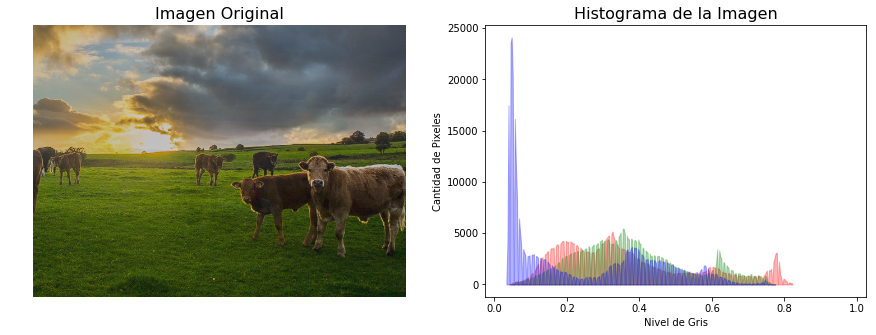

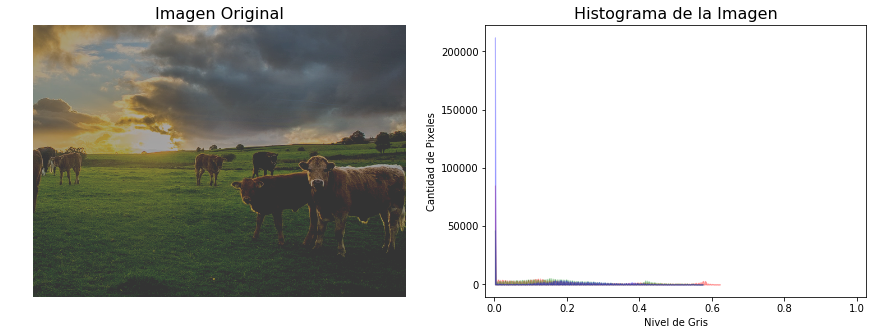

In [8]:
#Leemos una de las imágenes de prueba, en este caso img5.png
img = io.imread("imagenes/img5.png")

# Cambiamos la representación de la imagen a real:
img = skimage.img_as_float64(img)

# Aplicamos la operación de disminución del brillo imagen
img_2 = img - 0.2

# Devolvemos la imagen al rango [0,1] usamos la función clip de NumPy
img_2 = np.clip(img_2, 0, 1)

# Mostramos la imagen original y su histograma
show_img_and_hist(img)

# Mostramos la imagen resultante y su histograma
show_img_and_hist(img_2)

### Estiramiento de los Niveles de Gris (Multiplicación)
El efecto de "estiramiento" se produce con la operación de multiplicación. Al igual que con el aumento o disminución del brillo, se debe tener cuidado con la saturación, por lo que es mejor trabajar con imágenes de tipo real.


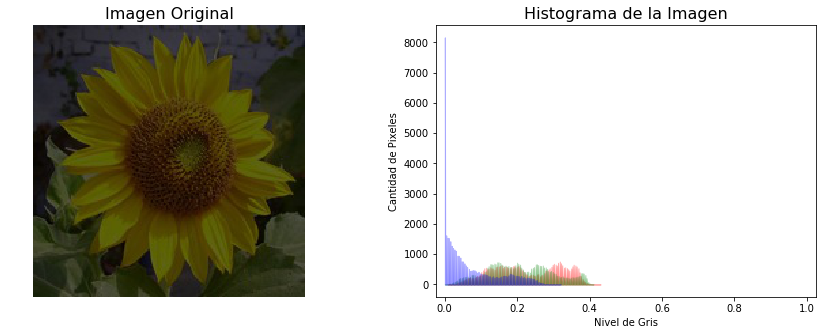

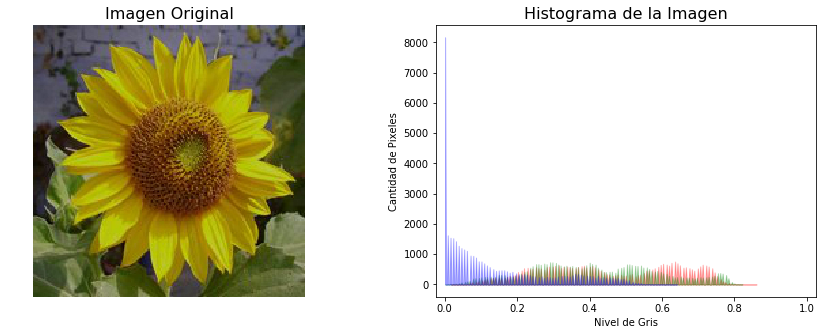

In [14]:
#Leemos una de las imágenes de prueba, en este caso tint2.jpg
img = io.imread("imagenes/tint2.jpg")

# Cambiamos la representación de la imagen a real:
img = skimage.img_as_float32(img)

# Aplicamos la operación de "estiramiento"
img_2 = img * 2

# Devolvemos la imagen al rango [0,1] usamos la función clip de NumPy
img_2 = np.clip(img_2, 0, 1)

# Mostramos la imagen original y su histograma
show_img_and_hist(img)

# Mostramos la imagen resultante y su histograma
show_img_and_hist(img_2)

### El Negativo de una Imagen
Esta es la última de las operaciones básicas puntuales con imágenes y consiste restar al máximo de nivel de gris (de acuerdo al tipo de dato de la imagen) el valor de cada píxel de la imagen.

float32


(-0.5, 623.5, 350.5, -0.5)

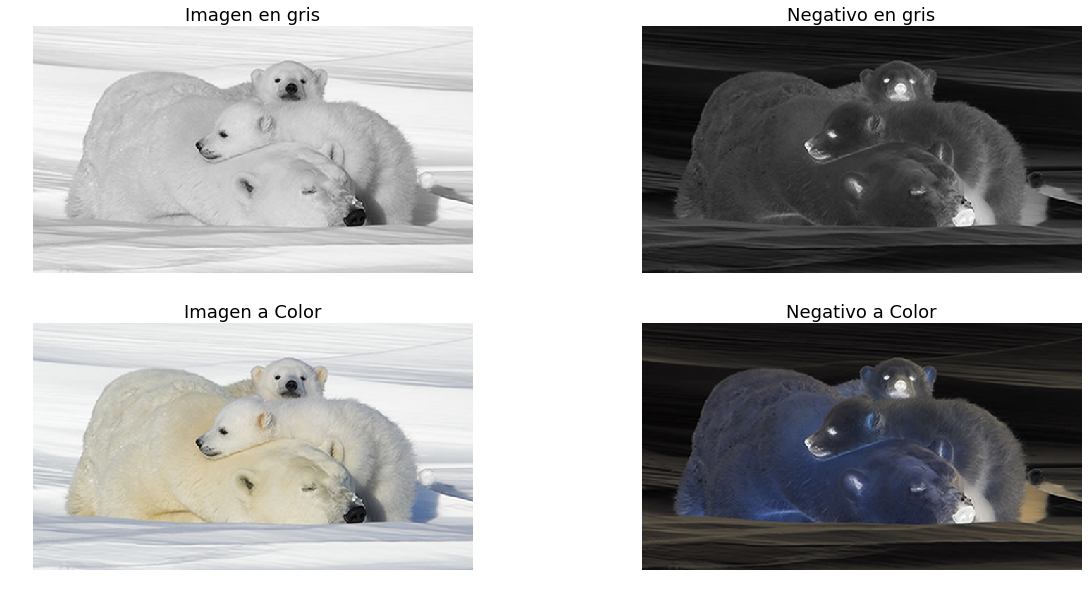

In [12]:
# Leemos una de las imágenes de prueba asegurandonos que su tipo sea real
img = skimage.img_as_float32(io.imread("imagenes/img1.jpg"))

# Obtenemos la versión en escala de grises de la imagen
img_g = color.rgb2gray(img)

# Calulamos el negativo de ambas imágenes
img_neg = 1 - img
img_g_neg = 1 - img_g

# Mostramos las imágenes y sus negativos
f, ax = plt.subplots(2, 2, figsize=(20, 10))

ax[0,0].imshow(img_g, cmap="gray", norm=cl.Normalize(vmin=0.0, vmax=1.0))
ax[0,0].set_title('Imagen en gris', fontsize=18)
ax[0,0].axis('off')

ax[0,1].imshow(img_g_neg, cmap="gray", norm=cl.Normalize(vmin=0.0, vmax=1.0))
ax[0,1].set_title('Negativo en gris', fontsize=18)
ax[0,1].axis('off')

# Se muestra en el segundo subplot la imagen 1, se le asigna un título y se pone el nombre al eje X
ax[1,0].imshow(img)
ax[1,0].set_title('Imagen a Color', fontsize=18)
ax[1,0].axis('off')

ax[1,1].imshow(img_neg)
ax[1,1].set_title('Negativo a Color', fontsize=18)
ax[1,1].axis('off')


## Entregables de la Prácica

A continuación deberá encontrará una serie de ejercicios que debe desarrollar y entregar.

### Ejercicio 1. Análisis de Histogramas
Como se ha mencionado, el histograma de una imagen nos permitir analizar la distribución de los niveles de gris de una imagen para definir las operaciones que se pueden usar para mejorar la calidad de las mismas.

En este punto usted debe analizar los histogramas de algunas de las imágenes y definir si la calidad es buena o no con base en la información del histograma. Explique su respuesta.

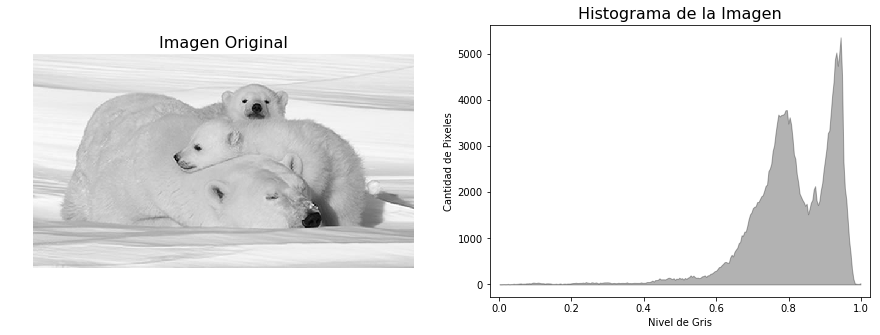

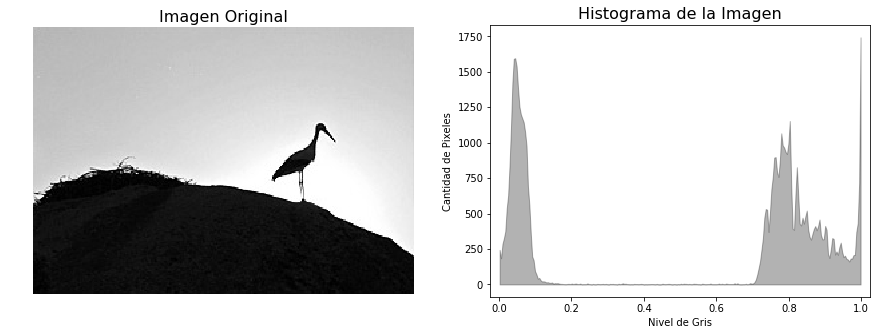

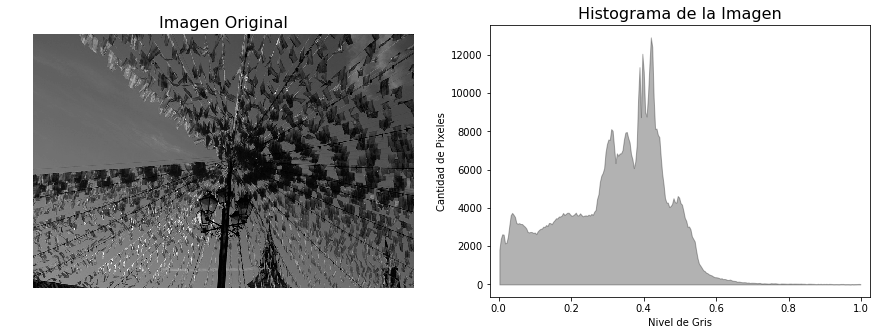

In [25]:
# Lea las imágenes img1.jpg, img2.png e img3.jpg en las variables img1, img2 e img3, respectivamente.
img1 = skimage.img_as_float32(io.imread('./imagenes/img1.jpg'))
img2 = skimage.img_as_float32(io.imread('./imagenes/img2.png'))
img3 = skimage.img_as_float32(io.imread('./imagenes/img3.jpg'))


# Convierta las imágenes a tonos de gris usando la función rgb2gray
img1g = np.clip(color.rgb2gray(img1),0,1)
img2g = np.clip(color.rgb2gray(img2),0,1)
img3g = np.clip(color.rgb2gray(img3),0,1)


# Calcule y muestre los histogramas de las imágenes en niveles de gris
# Use la función show_img_and_hist que se creó arriba

show_img_and_hist(img1g)
show_img_and_hist(img2g)
show_img_and_hist(img3g)



En la cela de abajo, describa cada uno de los histogramas indicando la relación entre lo que ve en el histograma y el contenido de cada imagen

Ahora cacule y visualice los histogramas de las imágenes en color:

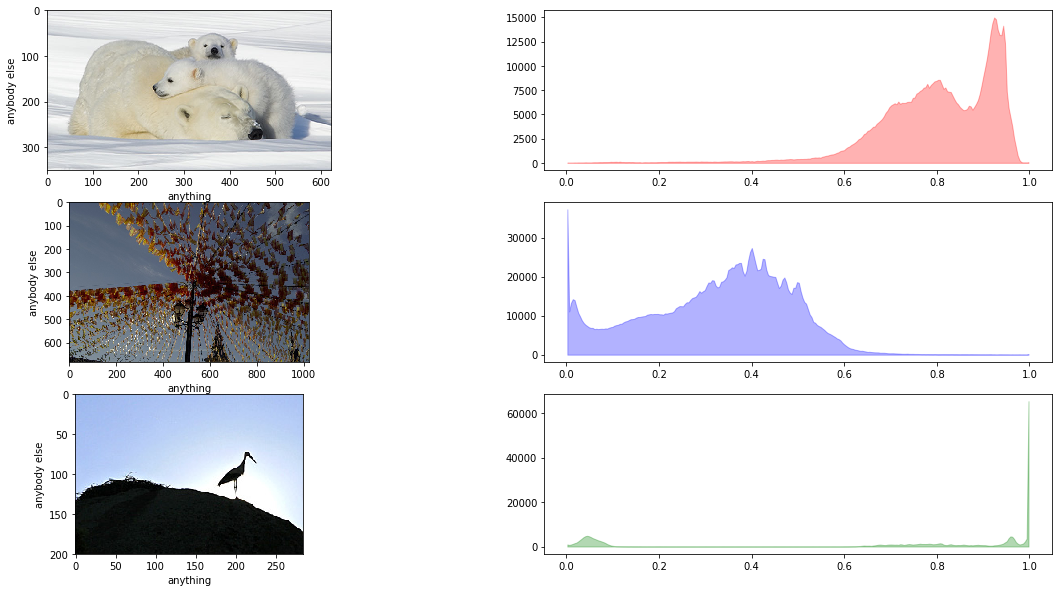

In [17]:
# Calcule y visualice los histogramas a color de las tres imágenes
R = skimage.img_as_float32(io.imread("imagenes/img1.jpg"))
G = skimage.img_as_float32(io.imread("imagenes/img2.png"))
B = skimage.img_as_float32(io.imread("imagenes/img3.jpg"))

_hist_r, bins_r = exposure.histogram(R)
_hist_g, bins_g = exposure.histogram(G)
_hist_b, bins_b = exposure.histogram(B)

f, _ax = plt.subplots(3 , 2, figsize=(20,10))

_ax[0,0].imshow(R)
#_ax[0,0].set_title("Original image",fontsize=18)
_ax[0,0].set_xlabel("anything")
_ax[0,0].set_ylabel("anybody else")
_ax[0,1].fill_between(bins_r, _hist_r, alpha=0.3, color='r')

_ax[2,0].imshow(G)
#_ax[2,0].set_title("Original image",fontsize=18)
_ax[2,0].set_xlabel("anything")
_ax[2,0].set_ylabel("anybody else")
_ax[2,1].fill_between(bins_g, _hist_g, alpha=0.3, color='g')

_ax[1,0].imshow(B)
#_ax[1,0].set_title("Original image",fontsize=18)
_ax[1,0].set_xlabel("anything")
_ax[1,0].set_ylabel("anybody else")
_ax[1,1].fill_between(bins_b, _hist_b, alpha=0.3, color='b')

En la celda de abajo, indique si hay diferencias substanciales entre el histograma de las imágenes a color y las imágenes en niveles de gris. Si los hay, Explique a qué se debe esta diferencia.



### Ejercicio 2. Transformación Lineal

Escriba una función que implemente la forma general de una transformación lineal $G(x,y) =  a * I(x,y) + b$. Use la siguiente plantilla:

In [ ]:
def transformacion_lineal(img, a, b):
    out = img.copy()
    
    # Implemente aquí el contenido de la función
    
    return out 

### Ejercicio 3. Uso de Transformaciones Lineales

Identifique qué transformación lineal fue usada para crear cada una de los cuatro resultados de la siguiente imagen. Use la función `transformacion_lineal` para aplicar esa transformación a la imagen y mostrar el histograma resultante. Visualice y compare los histogramas de las imágenes dadas (R1, R2 y R3) con los obtenidos con sus transformaciones e indique en cuales hubo resultados similares y en cuales resultados exactos.

![alt text](imagenes/transformaciones.png)


In [ ]:
# Cargue la imagen original
img = ...

# Visualice el histograma de la imagen anterior
...

In [ ]:
# Cargue las imagenes R1, R2 y R3 en las siguientes variables y visualice sus histogramas
img1 = ...

img2 = ...

img3 = ...


Analice el histograma de la imagen original y comparelo con los histogramas de las imágenes R1, R2 y R3. Con base en su observación, ¿qué transformaciones se usan sobre la imagen original para obtener esas imágenes?

Haga la discusión en la celda de abajo:

¿Qué transformaciones se usan sobre la imagen original para obtener estas imágenes?

* Para la imagen R1: 
* Para la imagen R2:
* Para la imagen R3: 

In [ ]:
# Use la función transformacion_lineal para aplicar dichas transformaciones

R1 = ...

R2 = ...

R3 = ...

In [ ]:
# Visualice los histogramas de las imagenes dadas y las imágenes que usted obtuvo 


En la celda de abajo, ¿Hay diferencias en los histogramas?, ¿Por qué si?, ¿Por qué no?
